<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/Churn_Modelling.csv')

In [3]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3758,514,France,Male,38,4,112230.38,1,1,0,16717.11,1
7468,542,Spain,Female,26,2,0.00,2,1,1,54869.54,0


In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)

In [7]:
ohe.fit_transform(df[['Geography','Gender']])

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.]])

In [8]:
ohe.get_feature_names_out(['Geography','Gender'])

array(['Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype=object)

In [9]:
df[ohe.get_feature_names_out(['Geography','Gender'])]=pd.DataFrame(ohe.fit_transform(df[['Geography','Gender']]),columns=ohe.get_feature_names_out(['Geography','Gender']))

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


In [11]:
df.drop(columns=['Geography','Gender'],inplace=True)

In [12]:
df.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
4302,544,44,2,108895.93,1,0,0,69228.20,1,1.0,0.0,1.0
2041,840,39,1,94968.97,1,1,0,84487.62,0,0.0,0.0,0.0


In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [16]:
ss.fit(X_train)

StandardScaler()

In [17]:
X_train_scaled=ss.transform(X_train)

In [18]:
X_test_scaled=ss.transform(X_test)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [20]:
X_train_scaled.shape

(8000, 11)

In [21]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=X_train_scaled.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(X_train_scaled,y_train,validation_split=0.2,batch_size=32,epochs=100)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7913 - loss: 0.5432 - val_accuracy: 0.8031 - val_loss: 0.4589
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7904 - loss: 0.4683 - val_accuracy: 0.8125 - val_loss: 0.4296
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8065 - loss: 0.4345 - val_accuracy: 0.8131 - val_loss: 0.4186
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.4221 - val_accuracy: 0.8125 - val_loss: 0.4131
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8187 - loss: 0.4167 - val_accuracy: 0.8181 - val_loss: 0.4079
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8156 - loss: 0.4101 - val_accuracy: 0.8225 - val_loss: 0.4022
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8273 - loss: 0.3948 - val_accuracy: 0.8250 - val_loss: 0.3979
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8348 - loss: 0.3864 - val_accu

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

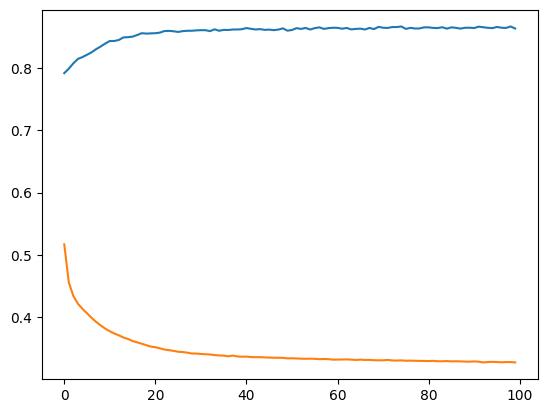

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [37]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02693735],
       [0.02746729],
       [0.12261879],
       ...,
       [0.6786125 ],
       [0.07874526],
       [0.27772495]], dtype=float32)

In [39]:
y_prd=model.predict(X_test_scaled).argmax(axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prd)

0.8035

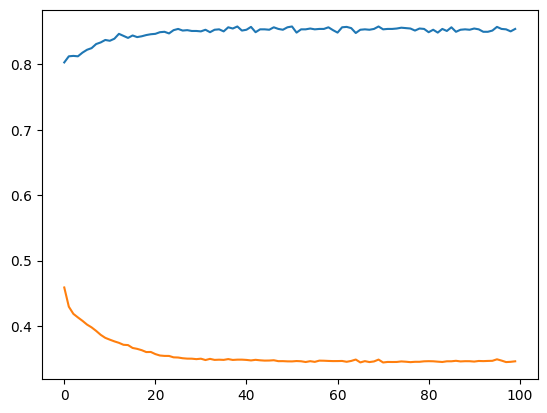

In [41]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.show()